In [2]:
pip install xgboost


  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn import metrics

from sklearn.metrics import r2_score, mean_squared_error
import joblib

In [4]:
calories_data = pd.read_csv("calories.csv")


In [5]:
print(calories_data.head())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [6]:
exercise_data = pd.read_csv("exercise.csv")

In [7]:
print(exercise_data.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


In [12]:
combined_data = pd.concat([exercise_data,calories_data['Calories']], axis=1)

In [13]:
print(combined_data.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [14]:
combined_data.shape

(15000, 9)

In [15]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [17]:
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [26]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

C:\Users\shahw\AppData\Local\Temp\ipykernel_18924\2055377404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [27]:
combined_data.drop(['User_ID'] , axis=1)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: ylabel='count'>

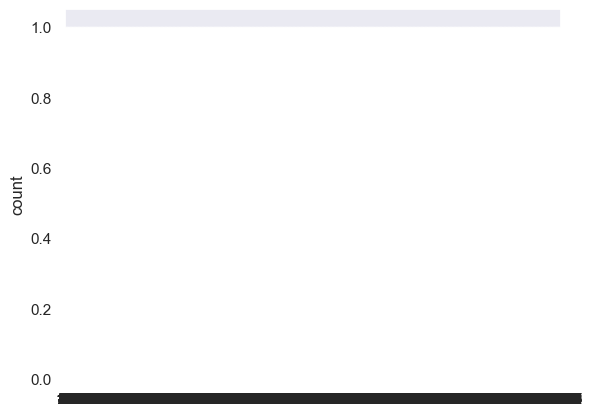

In [33]:
sns.countplot(combined_data["Gender"])

In [51]:
X = combined_data.drop(['User_ID', 'Calories'], axis=1)
Y = combined_data['Calories']

In [52]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [53]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [54]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.2 , random_state=2)


In [56]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


In [57]:
model = XGBRegressor()

In [58]:
model.fit( X_train , Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [59]:
calories_burnt_prideict = model.predict(X_test)

In [60]:
print(calories_burnt_prideict)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [61]:
MAE = metrics.mean_absolute_error(Y_test, calories_burnt_prideict)

In [62]:
print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  1.4833678883314132


In [63]:

r2 = r2_score(Y_test, calories_burnt_prideict)
mse = mean_squared_error(Y_test, calories_burnt_prideict)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", MAE)

R² Score: 0.998800624504713
Mean Squared Error: 4.710710012461346
Mean Absolute Error: 1.4833678883314132


In [64]:
# Save model
joblib.dump(model, "calorie_burn_model.pkl")
print("Model saved successfully.")

Model saved successfully.


In [65]:
# Load the model
model = joblib.load("calorie_burn_model.pkl")

# Your input [Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp]
user_input = np.array([[0, 22, 170, 65, 30, 120, 37.5]])

# Make prediction
prediction = model.predict(user_input)

print(f"🔥 Calories Burnt: {prediction[0]:.2f}")


🔥 Calories Burnt: 218.22


In [66]:
# Step 1: Load the trained model
model = joblib.load("calorie_burn_model.pkl")

# Step 2: Define user input (in the correct order)
# Format: [Gender, Age, Height(cm), Weight(kg), Duration(min), Heart Rate, Body Temperature(°C)]

gender = 0            # 0 = Male, 1 = Female
age = 22
height = 170          # in centimeters
weight = 65           # in kilograms
duration = 30         # in minutes
heart_rate = 120
body_temp = 37.5      # in Celsius

# Step 3: Combine input into a 2D NumPy array
user_input = np.array([[gender, age, height, weight, duration, heart_rate, body_temp]])

# Step 4: Make prediction
predicted_calories = model.predict(user_input)

# Step 5: Show result
print(f"🔥 Predicted Calories Burnt: {predicted_calories[0]:.2f} kcal")

🔥 Predicted Calories Burnt: 218.22 kcal
